# 필요한 라이브러리 불러오기

In [1]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import exchange_calendars as ecals 
import datetime

XKRX = ecals.get_calendar("XKRX",side="left")

# csv 불러오기

In [4]:
증권뉴스=pd.read_csv('./증권4개년_3차프로젝트_형태소(수정).csv')
증권뉴스

제목                 작성시간  \
0                         인사 국민연금공단 기금운용본부  2017-01-01 22:53:00   
1                  국민연금 기금운용본부 운용전략실장에 이수철  2017-01-01 21:37:00   
2                  금리 오르면 사모펀드에 투자기회 늘어날 것  2017-01-01 19:45:00   
3                 마켓인사이트 KB증권 JW바이오 지분  인수  2017-01-01 19:41:00   
4                증권사 이달부터 ELS 헤지자산 구분 관리해야  2017-01-01 19:39:00   
...                                    ...                  ...   
1461861         한국항공우주 국방과학연구소와 억 규모 계약 체결  2020-12-31 13:43:00   
1461862         사라지지 않은 코로나백신치료제 더 오른다 유망주  2020-12-31 13:42:00   
1461863  동학개미 덕에 두 배 뛴 반도체슈퍼사이클로 더 간다  유망주  2020-12-31 13:41:00   
1461864             채권 전문가  내년 채권 금리 보합 전망  2020-12-31 13:40:00   
1461865                           인사KR투자증권  2020-12-31 13:37:00   

                                                       형태소   점수  
0               ['인사', '국민', '연금', '공단', '기금', '운용', '본부']  0.0  
1        ['국민', '연금', '기금', '운용', '본부', '운용', '전략', '실장...  0.0  
2        ['금리', '오르', '면', '사모', '펀드', '에', '투자', '기회',...  1.0  
3        ['마켓', '인사이트', 'KB', '증권', 'JW', '바이오', '지분', ...  0.0  
4        ['증권사', '이달', '부터', 'ELS', '헤지', '자산', '구분', '...  0.0  
...                                                    ...  ...  
1461861  ['한국', '항공우주', '국방과학연구소', '와', '억', '규모', '계약'...  0.0  
1461862  ['사라지', '지', '않', '은', '코로나', '백신', '치료제', '더'...  0.0  
1461863  ['동학', '개미', '덕', '에', '두', '배', '뛴', '반도체', '...  1.0  
1461864        ['채권', '전문가', '내년', '채권', '금리', '보합', '전망']  1.0  
1461865                           ['인사', 'KR', '투자', '증권']  0.0  

[1461866 rows x 4 columns]

# 코스피 개장일, 감성어 점수, 감성어 change 데이터 전처리

In [5]:
# 코스피 개장일만 리스트로 담기 
df = fdr.DataReader('KS11', '2017','2021')
kspi_list=df.index.strftime('%Y-%m-%d').tolist()
kspi_list

['2017-01-02',
 '2017-01-03',
 '2017-01-04',
 '2017-01-05',
 '2017-01-06',
 '2017-01-09',
 '2017-01-10',
 '2017-01-11',
 '2017-01-12',
 '2017-01-13',
 '2017-01-16',
 '2017-01-17',
 '2017-01-18',
 '2017-01-19',
 '2017-01-20',
 '2017-01-23',
 '2017-01-24',
 '2017-01-25',
 '2017-01-26',
 '2017-01-31',
 '2017-02-01',
 '2017-02-02',
 '2017-02-03',
 '2017-02-06',
 '2017-02-07',
 '2017-02-08',
 '2017-02-09',
 '2017-02-10',
 '2017-02-13',
 '2017-02-14',
 '2017-02-15',
 '2017-02-16',
 '2017-02-17',
 '2017-02-20',
 '2017-02-21',
 '2017-02-22',
 '2017-02-23',
 '2017-02-24',
 '2017-02-27',
 '2017-02-28',
 '2017-03-02',
 '2017-03-03',
 '2017-03-06',
 '2017-03-07',
 '2017-03-08',
 '2017-03-09',
 '2017-03-10',
 '2017-03-13',
 '2017-03-14',
 '2017-03-15',
 '2017-03-16',
 '2017-03-17',
 '2017-03-20',
 '2017-03-21',
 '2017-03-22',
 '2017-03-23',
 '2017-03-24',
 '2017-03-27',
 '2017-03-28',
 '2017-03-29',
 '2017-03-30',
 '2017-03-31',
 '2017-04-03',
 '2017-04-04',
 '2017-04-05',
 '2017-04-06',
 '2017-04-

In [6]:
df

Close     Open     High      Low        Volume  Change
Date                                                                
2017-01-02  2026.16  2022.23  2031.79  2015.68  2.298800e+08 -0.0001
2017-01-03  2043.97  2034.31  2044.07  2028.47  2.681300e+08  0.0088
2017-01-04  2045.64  2046.29  2046.29  2040.61  3.714900e+08  0.0008
2017-01-05  2041.95  2045.52  2046.50  2039.49  5.413400e+08 -0.0018
2017-01-06  2049.12  2048.11  2051.84  2045.66  4.553500e+08  0.0035
...             ...      ...      ...      ...           ...     ...
2020-12-23  2759.82  2737.74  2769.08  2716.28  1.120000e+09  0.0096
2020-12-24  2806.86  2762.60  2812.16  2762.60  1.030000e+09  0.0170
2020-12-28  2808.60  2820.95  2834.59  2799.56  1.010000e+09  0.0006
2020-12-29  2820.51  2810.55  2823.44  2792.06  1.050000e+09  0.0042
2020-12-30  2873.47  2820.36  2878.21  2809.35  1.070000e+09  0.0188

[981 rows x 6 columns]

In [7]:
df['감성어점수']=np.nan
# df.reindex(columns=df.columns.tolist()+['감성어점수'])

In [8]:
df['감성어_Change']=np.nan

In [9]:
df

Close     Open     High      Low        Volume  Change  감성어점수  \
Date                                                                          
2017-01-02  2026.16  2022.23  2031.79  2015.68  2.298800e+08 -0.0001    NaN   
2017-01-03  2043.97  2034.31  2044.07  2028.47  2.681300e+08  0.0088    NaN   
2017-01-04  2045.64  2046.29  2046.29  2040.61  3.714900e+08  0.0008    NaN   
2017-01-05  2041.95  2045.52  2046.50  2039.49  5.413400e+08 -0.0018    NaN   
2017-01-06  2049.12  2048.11  2051.84  2045.66  4.553500e+08  0.0035    NaN   
...             ...      ...      ...      ...           ...     ...    ...   
2020-12-23  2759.82  2737.74  2769.08  2716.28  1.120000e+09  0.0096    NaN   
2020-12-24  2806.86  2762.60  2812.16  2762.60  1.030000e+09  0.0170    NaN   
2020-12-28  2808.60  2820.95  2834.59  2799.56  1.010000e+09  0.0006    NaN   
2020-12-29  2820.51  2810.55  2823.44  2792.06  1.050000e+09  0.0042    NaN   
2020-12-30  2873.47  2820.36  2878.21  2809.35  1.070000e+09  0.0188    NaN   

            감성어_Change  
Date                    
2017-01-02         NaN  
2017-01-03         NaN  
2017-01-04         NaN  
2017-01-05         NaN  
2017-01-06         NaN  
...                ...  
2020-12-23         NaN  
2020-12-24         NaN  
2020-12-28         NaN  
2020-12-29         NaN  
2020-12-30         NaN  

[981 rows x 8 columns]

### 개장일에 해당하는 날짜의 뉴스기사마다 라벨링 되어 있는 감성점수(-1,0,1)의 총합을 감성어 점수칼럼에 입력

In [10]:
for i in range(len(kspi_list)):
    당일종가=kspi_list[i]+' 15:30:00'
    전일종가=XKRX.previous_open(kspi_list[i]).strftime('%Y-%m-%d %15:%31:00')
    감성어점수=sum(증권뉴스[(증권뉴스['작성시간']<당일종가)&(증권뉴스['작성시간']>전일종가)].점수)
    df.iloc[i,6]=감성어점수
    print(i,'번째를 실행했습니다.')
    

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

520 번째를 실행했습니다.
521 번째를 실행했습니다.
522 번째를 실행했습니다.
523 번째를 실행했습니다.
524 번째를 실행했습니다.
525 번째를 실행했습니다.
526 번째를 실행했습니다.
527 번째를 실행했습니다.
528 번째를 실행했습니다.
529 번째를 실행했습니다.
530 번째를 실행했습니다.
531 번째를 실행했습니다.
532 번째를 실행했습니다.
533 번째를 실행했습니다.
534 번째를 실행했습니다.
535 번째를 실행했습니다.
536 번째를 실행했습니다.
537 번째를 실행했습니다.
538 번째를 실행했습니다.
539 번째를 실행했습니다.
540 번째를 실행했습니다.
541 번째를 실행했습니다.
542 번째를 실행했습니다.
543 번째를 실행했습니다.
544 번째를 실행했습니다.
545 번째를 실행했습니다.
546 번째를 실행했습니다.
547 번째를 실행했습니다.
548 번째를 실행했습니다.
549 번째를 실행했습니다.
550 번째를 실행했습니다.
551 번째를 실행했습니다.
552 번째를 실행했습니다.
553 번째를 실행했습니다.
554 번째를 실행했습니다.
555 번째를 실행했습니다.
556 번째를 실행했습니다.
557 번째를 실행했습니다.
558 번째를 실행했습니다.
559 번째를 실행했습니다.
560 번째를 실행했습니다.
561 번째를 실행했습니다.
562 번째를 실행했습니다.
563 번째를 실행했습니다.
564 번째를 실행했습니다.
565 번째를 실행했습니다.
566 번째를 실행했습니다.
567 번째를 실행했습니다.
568 번째를 실행했습니다.
569 번째를 실행했습니다.
570 번째를 실행했습니다.
571 번째를 실행했습니다.
572 번째를 실행했습니다.
573 번째를 실행했습니다.
574 번째를 실행했습니다.
575 번째를 실행했습니다.
576 번째를 실행했습니다.
577 번째를 실행했습니다.
578 번째를 실행했습니다.
579 번째를 실행했습니다.
580 번째를 실행했습니다.
581 번째를 실행했습니다.
582 번째를 

### 개장일에 해당하는 감성어 비율을 감성어_change 컬럼에 입력
### * 감성어 비율 = (당일 감성어점수- 전일 감성어 점수) / 전일 감성어 점수 

In [11]:
for i in range(len(kspi_list)):
    감성어비율 = (df.iloc[i+1,6]-df.iloc[i,6])/df.iloc[i,6]
    df.iloc[i+1,7]=감성어비율
    
    print(i,'번째를 실행했습니다.')

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

685 번째를 실행했습니다.
686 번째를 실행했습니다.
687 번째를 실행했습니다.
688 번째를 실행했습니다.
689 번째를 실행했습니다.
690 번째를 실행했습니다.
691 번째를 실행했습니다.
692 번째를 실행했습니다.
693 번째를 실행했습니다.
694 번째를 실행했습니다.
695 번째를 실행했습니다.
696 번째를 실행했습니다.
697 번째를 실행했습니다.
698 번째를 실행했습니다.
699 번째를 실행했습니다.
700 번째를 실행했습니다.
701 번째를 실행했습니다.
702 번째를 실행했습니다.
703 번째를 실행했습니다.
704 번째를 실행했습니다.
705 번째를 실행했습니다.
706 번째를 실행했습니다.
707 번째를 실행했습니다.
708 번째를 실행했습니다.
709 번째를 실행했습니다.
710 번째를 실행했습니다.
711 번째를 실행했습니다.
712 번째를 실행했습니다.
713 번째를 실행했습니다.
714 번째를 실행했습니다.
715 번째를 실행했습니다.
716 번째를 실행했습니다.
717 번째를 실행했습니다.
718 번째를 실행했습니다.
719 번째를 실행했습니다.
720 번째를 실행했습니다.
721 번째를 실행했습니다.
722 번째를 실행했습니다.
723 번째를 실행했습니다.
724 번째를 실행했습니다.
725 번째를 실행했습니다.
726 번째를 실행했습니다.
727 번째를 실행했습니다.
728 번째를 실행했습니다.
729 번째를 실행했습니다.
730 번째를 실행했습니다.
731 번째를 실행했습니다.
732 번째를 실행했습니다.
733 번째를 실행했습니다.
734 번째를 실행했습니다.
735 번째를 실행했습니다.
736 번째를 실행했습니다.
737 번째를 실행했습니다.
738 번째를 실행했습니다.
739 번째를 실행했습니다.
740 번째를 실행했습니다.
741 번째를 실행했습니다.
742 번째를 실행했습니다.
743 번째를 실행했습니다.
744 번째를 실행했습니다.
745 번째를 실행했습니다.
746 번째를 실행했습니다.
747 번째를 

IndexError: single positional indexer is out-of-bounds

### 감성어의 20일 비율을 감성어 20일 비율 컬럼에 담아냄
### *감성어 20일비율 = (20일 전 감성어 점수 - 당일 감성어 점수 )/ 당일 감성어 점수

In [12]:
df['감성어20일_Change']=np.nan
df

Close     Open     High      Low        Volume  Change  감성어점수  \
Date                                                                          
2017-01-02  2026.16  2022.23  2031.79  2015.68  2.298800e+08 -0.0001  115.0   
2017-01-03  2043.97  2034.31  2044.07  2028.47  2.681300e+08  0.0088  149.0   
2017-01-04  2045.64  2046.29  2046.29  2040.61  3.714900e+08  0.0008  121.0   
2017-01-05  2041.95  2045.52  2046.50  2039.49  5.413400e+08 -0.0018  120.0   
2017-01-06  2049.12  2048.11  2051.84  2045.66  4.553500e+08  0.0035  112.0   
...             ...      ...      ...      ...           ...     ...    ...   
2020-12-23  2759.82  2737.74  2769.08  2716.28  1.120000e+09  0.0096   85.0   
2020-12-24  2806.86  2762.60  2812.16  2762.60  1.030000e+09  0.0170  100.0   
2020-12-28  2808.60  2820.95  2834.59  2799.56  1.010000e+09  0.0006  216.0   
2020-12-29  2820.51  2810.55  2823.44  2792.06  1.050000e+09  0.0042  136.0   
2020-12-30  2873.47  2820.36  2878.21  2809.35  1.070000e+09  0.0188  137.0   

            감성어_Change  감성어20일_Change  
Date                                   
2017-01-02         NaN            NaN  
2017-01-03    0.295652            NaN  
2017-01-04   -0.187919            NaN  
2017-01-05   -0.008264            NaN  
2017-01-06   -0.066667            NaN  
...                ...            ...  
2020-12-23   -0.158416            NaN  
2020-12-24    0.176471            NaN  
2020-12-28    1.160000            NaN  
2020-12-29   -0.370370            NaN  
2020-12-30    0.007353            NaN  

[981 rows x 9 columns]

In [16]:
for i in range(len(kspi_list)):
    감성어20일비율 = (df.iloc[i+19,6]-df.iloc[i,6])/df.iloc[i,6]
    df.iloc[i+19,8]=감성어20일비율
    
    print(i,'번째를 실행했습니다.')

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

679 번째를 실행했습니다.
680 번째를 실행했습니다.
681 번째를 실행했습니다.
682 번째를 실행했습니다.
683 번째를 실행했습니다.
684 번째를 실행했습니다.
685 번째를 실행했습니다.
686 번째를 실행했습니다.
687 번째를 실행했습니다.
688 번째를 실행했습니다.
689 번째를 실행했습니다.
690 번째를 실행했습니다.
691 번째를 실행했습니다.
692 번째를 실행했습니다.
693 번째를 실행했습니다.
694 번째를 실행했습니다.
695 번째를 실행했습니다.
696 번째를 실행했습니다.
697 번째를 실행했습니다.
698 번째를 실행했습니다.
699 번째를 실행했습니다.
700 번째를 실행했습니다.
701 번째를 실행했습니다.
702 번째를 실행했습니다.
703 번째를 실행했습니다.
704 번째를 실행했습니다.
705 번째를 실행했습니다.
706 번째를 실행했습니다.
707 번째를 실행했습니다.
708 번째를 실행했습니다.
709 번째를 실행했습니다.
710 번째를 실행했습니다.
711 번째를 실행했습니다.
712 번째를 실행했습니다.
713 번째를 실행했습니다.
714 번째를 실행했습니다.
715 번째를 실행했습니다.
716 번째를 실행했습니다.
717 번째를 실행했습니다.
718 번째를 실행했습니다.
719 번째를 실행했습니다.
720 번째를 실행했습니다.
721 번째를 실행했습니다.
722 번째를 실행했습니다.
723 번째를 실행했습니다.
724 번째를 실행했습니다.
725 번째를 실행했습니다.
726 번째를 실행했습니다.
727 번째를 실행했습니다.
728 번째를 실행했습니다.
729 번째를 실행했습니다.
730 번째를 실행했습니다.
731 번째를 실행했습니다.
732 번째를 실행했습니다.
733 번째를 실행했습니다.
734 번째를 실행했습니다.
735 번째를 실행했습니다.
736 번째를 실행했습니다.
737 번째를 실행했습니다.
738 번째를 실행했습니다.
739 번째를 실행했습니다.
740 번째를 실행했습니다.
741 번째를 

IndexError: single positional indexer is out-of-bounds

### 감성어20일을 평균내어 감성어 20일 평균 컬럼에 담아냄

In [22]:
df['감성어20일평균']=np.nan

for i in range(len(kspi_list)):
    j=i-19
    if j>=0:
        감성어20일평균 = sum(df.iloc[j:i,6])/20
        df.iloc[i,9]=감성어20일평균
    else:
        pass
    
    print(i,'번째를 실행했습니다.')

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

616 번째를 실행했습니다.
617 번째를 실행했습니다.
618 번째를 실행했습니다.
619 번째를 실행했습니다.
620 번째를 실행했습니다.
621 번째를 실행했습니다.
622 번째를 실행했습니다.
623 번째를 실행했습니다.
624 번째를 실행했습니다.
625 번째를 실행했습니다.
626 번째를 실행했습니다.
627 번째를 실행했습니다.
628 번째를 실행했습니다.
629 번째를 실행했습니다.
630 번째를 실행했습니다.
631 번째를 실행했습니다.
632 번째를 실행했습니다.
633 번째를 실행했습니다.
634 번째를 실행했습니다.
635 번째를 실행했습니다.
636 번째를 실행했습니다.
637 번째를 실행했습니다.
638 번째를 실행했습니다.
639 번째를 실행했습니다.
640 번째를 실행했습니다.
641 번째를 실행했습니다.
642 번째를 실행했습니다.
643 번째를 실행했습니다.
644 번째를 실행했습니다.
645 번째를 실행했습니다.
646 번째를 실행했습니다.
647 번째를 실행했습니다.
648 번째를 실행했습니다.
649 번째를 실행했습니다.
650 번째를 실행했습니다.
651 번째를 실행했습니다.
652 번째를 실행했습니다.
653 번째를 실행했습니다.
654 번째를 실행했습니다.
655 번째를 실행했습니다.
656 번째를 실행했습니다.
657 번째를 실행했습니다.
658 번째를 실행했습니다.
659 번째를 실행했습니다.
660 번째를 실행했습니다.
661 번째를 실행했습니다.
662 번째를 실행했습니다.
663 번째를 실행했습니다.
664 번째를 실행했습니다.
665 번째를 실행했습니다.
666 번째를 실행했습니다.
667 번째를 실행했습니다.
668 번째를 실행했습니다.
669 번째를 실행했습니다.
670 번째를 실행했습니다.
671 번째를 실행했습니다.
672 번째를 실행했습니다.
673 번째를 실행했습니다.
674 번째를 실행했습니다.
675 번째를 실행했습니다.
676 번째를 실행했습니다.
677 번째를 실행했습니다.
678 번째를 

In [23]:
df20=df.copy()
df20.dropna(inplace=True)
df20.corr()

Close      Open      High       Low    Volume    Change  \
Close          1.000000  0.995597  0.997682  0.998383 -0.014688  0.081866   
Open           0.995597  1.000000  0.998512  0.997590 -0.013687  0.011139   
High           0.997682  0.998512  1.000000  0.997338  0.000410  0.034849   
Low            0.998383  0.997590  0.997338  1.000000 -0.030745  0.051858   
Volume        -0.014688 -0.013687  0.000410 -0.030745  1.000000  0.025141   
Change         0.081866  0.011139  0.034849  0.051858  0.025141  1.000000   
감성어점수         -0.145964 -0.151480 -0.152375 -0.144689  0.070931  0.188570   
감성어_Change     0.014689  0.012385  0.012739  0.012536  0.006233  0.071129   
감성어20일_Change  0.008064  0.007376  0.009198  0.008266  0.018476  0.000614   
감성어20일평균      -0.233789 -0.230787 -0.232295 -0.231937  0.139733 -0.056463   

                  감성어점수  감성어_Change  감성어20일_Change  감성어20일평균  
Close         -0.145964    0.014689       0.008064 -0.233789  
Open          -0.151480    0.012385       0.007376 -0.230787  
High          -0.152375    0.012739       0.009198 -0.232295  
Low           -0.144689    0.012536       0.008266 -0.231937  
Volume         0.070931    0.006233       0.018476  0.139733  
Change         0.188570    0.071129       0.000614 -0.056463  
감성어점수          1.000000    0.045381       0.089681  0.519446  
감성어_Change     0.045381    1.000000       0.028396 -0.047843  
감성어20일_Change  0.089681    0.028396       1.000000 -0.057672  
감성어20일평균       0.519446   -0.047843      -0.057672  1.000000

In [24]:
df20.to_csv('./20일평균포함(기존).csv')

### 감성어의 60일 평균을 감성어 60일 평균 컬럼에 담아냄¶

In [25]:
df['감성어60일평균']=np.nan

In [26]:
for i in range(len(kspi_list)):
    j=i-59
    if j>=0:
        감성어60일평균 = sum(df.iloc[j:i,6])/60
        df.iloc[i,10]=감성어60일평균
    else:
        pass
    
    print(i,'번째를 실행했습니다.')

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

622 번째를 실행했습니다.
623 번째를 실행했습니다.
624 번째를 실행했습니다.
625 번째를 실행했습니다.
626 번째를 실행했습니다.
627 번째를 실행했습니다.
628 번째를 실행했습니다.
629 번째를 실행했습니다.
630 번째를 실행했습니다.
631 번째를 실행했습니다.
632 번째를 실행했습니다.
633 번째를 실행했습니다.
634 번째를 실행했습니다.
635 번째를 실행했습니다.
636 번째를 실행했습니다.
637 번째를 실행했습니다.
638 번째를 실행했습니다.
639 번째를 실행했습니다.
640 번째를 실행했습니다.
641 번째를 실행했습니다.
642 번째를 실행했습니다.
643 번째를 실행했습니다.
644 번째를 실행했습니다.
645 번째를 실행했습니다.
646 번째를 실행했습니다.
647 번째를 실행했습니다.
648 번째를 실행했습니다.
649 번째를 실행했습니다.
650 번째를 실행했습니다.
651 번째를 실행했습니다.
652 번째를 실행했습니다.
653 번째를 실행했습니다.
654 번째를 실행했습니다.
655 번째를 실행했습니다.
656 번째를 실행했습니다.
657 번째를 실행했습니다.
658 번째를 실행했습니다.
659 번째를 실행했습니다.
660 번째를 실행했습니다.
661 번째를 실행했습니다.
662 번째를 실행했습니다.
663 번째를 실행했습니다.
664 번째를 실행했습니다.
665 번째를 실행했습니다.
666 번째를 실행했습니다.
667 번째를 실행했습니다.
668 번째를 실행했습니다.
669 번째를 실행했습니다.
670 번째를 실행했습니다.
671 번째를 실행했습니다.
672 번째를 실행했습니다.
673 번째를 실행했습니다.
674 번째를 실행했습니다.
675 번째를 실행했습니다.
676 번째를 실행했습니다.
677 번째를 실행했습니다.
678 번째를 실행했습니다.
679 번째를 실행했습니다.
680 번째를 실행했습니다.
681 번째를 실행했습니다.
682 번째를 실행했습니다.
683 번째를 실행했습니다.
684 번째를 

In [29]:
df60.to_csv('./60일평균포함(기존).csv')

### 감성어의 120일 평균을 감성어 120일 평균 컬럼에 담아냄

In [30]:
df['감성어120일평균']=np.nan

In [31]:
for i in range(len(kspi_list)):
    j=i-119
    if j>=0:
        감성어120일평균 = sum(df.iloc[j:i,6])/120
        df.iloc[i,11]=감성어120일평균
    else:
        pass
    
    print(i,'번째를 실행했습니다.')

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

656 번째를 실행했습니다.
657 번째를 실행했습니다.
658 번째를 실행했습니다.
659 번째를 실행했습니다.
660 번째를 실행했습니다.
661 번째를 실행했습니다.
662 번째를 실행했습니다.
663 번째를 실행했습니다.
664 번째를 실행했습니다.
665 번째를 실행했습니다.
666 번째를 실행했습니다.
667 번째를 실행했습니다.
668 번째를 실행했습니다.
669 번째를 실행했습니다.
670 번째를 실행했습니다.
671 번째를 실행했습니다.
672 번째를 실행했습니다.
673 번째를 실행했습니다.
674 번째를 실행했습니다.
675 번째를 실행했습니다.
676 번째를 실행했습니다.
677 번째를 실행했습니다.
678 번째를 실행했습니다.
679 번째를 실행했습니다.
680 번째를 실행했습니다.
681 번째를 실행했습니다.
682 번째를 실행했습니다.
683 번째를 실행했습니다.
684 번째를 실행했습니다.
685 번째를 실행했습니다.
686 번째를 실행했습니다.
687 번째를 실행했습니다.
688 번째를 실행했습니다.
689 번째를 실행했습니다.
690 번째를 실행했습니다.
691 번째를 실행했습니다.
692 번째를 실행했습니다.
693 번째를 실행했습니다.
694 번째를 실행했습니다.
695 번째를 실행했습니다.
696 번째를 실행했습니다.
697 번째를 실행했습니다.
698 번째를 실행했습니다.
699 번째를 실행했습니다.
700 번째를 실행했습니다.
701 번째를 실행했습니다.
702 번째를 실행했습니다.
703 번째를 실행했습니다.
704 번째를 실행했습니다.
705 번째를 실행했습니다.
706 번째를 실행했습니다.
707 번째를 실행했습니다.
708 번째를 실행했습니다.
709 번째를 실행했습니다.
710 번째를 실행했습니다.
711 번째를 실행했습니다.
712 번째를 실행했습니다.
713 번째를 실행했습니다.
714 번째를 실행했습니다.
715 번째를 실행했습니다.
716 번째를 실행했습니다.
717 번째를 실행했습니다.
718 번째를 

### 감성어의 10일 평균을 감성어 10일 평균 컬럼에 담아냄

In [34]:
df['감성어10일평균']=np.nan

In [35]:
for i in range(len(kspi_list)):
    j=i-9
    if j>=0:
        감성어10일평균 = sum(df.iloc[j:i,6])/10
        df.iloc[i,12]=감성어10일평균
    else:
        pass
    
    print(i,'번째를 실행했습니다.')

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

629 번째를 실행했습니다.
630 번째를 실행했습니다.
631 번째를 실행했습니다.
632 번째를 실행했습니다.
633 번째를 실행했습니다.
634 번째를 실행했습니다.
635 번째를 실행했습니다.
636 번째를 실행했습니다.
637 번째를 실행했습니다.
638 번째를 실행했습니다.
639 번째를 실행했습니다.
640 번째를 실행했습니다.
641 번째를 실행했습니다.
642 번째를 실행했습니다.
643 번째를 실행했습니다.
644 번째를 실행했습니다.
645 번째를 실행했습니다.
646 번째를 실행했습니다.
647 번째를 실행했습니다.
648 번째를 실행했습니다.
649 번째를 실행했습니다.
650 번째를 실행했습니다.
651 번째를 실행했습니다.
652 번째를 실행했습니다.
653 번째를 실행했습니다.
654 번째를 실행했습니다.
655 번째를 실행했습니다.
656 번째를 실행했습니다.
657 번째를 실행했습니다.
658 번째를 실행했습니다.
659 번째를 실행했습니다.
660 번째를 실행했습니다.
661 번째를 실행했습니다.
662 번째를 실행했습니다.
663 번째를 실행했습니다.
664 번째를 실행했습니다.
665 번째를 실행했습니다.
666 번째를 실행했습니다.
667 번째를 실행했습니다.
668 번째를 실행했습니다.
669 번째를 실행했습니다.
670 번째를 실행했습니다.
671 번째를 실행했습니다.
672 번째를 실행했습니다.
673 번째를 실행했습니다.
674 번째를 실행했습니다.
675 번째를 실행했습니다.
676 번째를 실행했습니다.
677 번째를 실행했습니다.
678 번째를 실행했습니다.
679 번째를 실행했습니다.
680 번째를 실행했습니다.
681 번째를 실행했습니다.
682 번째를 실행했습니다.
683 번째를 실행했습니다.
684 번째를 실행했습니다.
685 번째를 실행했습니다.
686 번째를 실행했습니다.
687 번째를 실행했습니다.
688 번째를 실행했습니다.
689 번째를 실행했습니다.
690 번째를 실행했습니다.
691 번째를 

### 감성어5일을 평균내어 감성어 5일평균 컬럼에 담아냄

In [37]:
df['감성어5일평균']=np.nan

for i in range(len(kspi_list)):
    j=i-4
    if j>=0:
        감성어5일평균 = sum(df.iloc[j:i,6])/5
        df.iloc[i,13]=감성어5일평균
    else:
        pass
    
    print(i,'번째를 실행했습니다.')
    
df5=df.copy()
df5.dropna(inplace=True)
df5.corr()

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

641 번째를 실행했습니다.
642 번째를 실행했습니다.
643 번째를 실행했습니다.
644 번째를 실행했습니다.
645 번째를 실행했습니다.
646 번째를 실행했습니다.
647 번째를 실행했습니다.
648 번째를 실행했습니다.
649 번째를 실행했습니다.
650 번째를 실행했습니다.
651 번째를 실행했습니다.
652 번째를 실행했습니다.
653 번째를 실행했습니다.
654 번째를 실행했습니다.
655 번째를 실행했습니다.
656 번째를 실행했습니다.
657 번째를 실행했습니다.
658 번째를 실행했습니다.
659 번째를 실행했습니다.
660 번째를 실행했습니다.
661 번째를 실행했습니다.
662 번째를 실행했습니다.
663 번째를 실행했습니다.
664 번째를 실행했습니다.
665 번째를 실행했습니다.
666 번째를 실행했습니다.
667 번째를 실행했습니다.
668 번째를 실행했습니다.
669 번째를 실행했습니다.
670 번째를 실행했습니다.
671 번째를 실행했습니다.
672 번째를 실행했습니다.
673 번째를 실행했습니다.
674 번째를 실행했습니다.
675 번째를 실행했습니다.
676 번째를 실행했습니다.
677 번째를 실행했습니다.
678 번째를 실행했습니다.
679 번째를 실행했습니다.
680 번째를 실행했습니다.
681 번째를 실행했습니다.
682 번째를 실행했습니다.
683 번째를 실행했습니다.
684 번째를 실행했습니다.
685 번째를 실행했습니다.
686 번째를 실행했습니다.
687 번째를 실행했습니다.
688 번째를 실행했습니다.
689 번째를 실행했습니다.
690 번째를 실행했습니다.
691 번째를 실행했습니다.
692 번째를 실행했습니다.
693 번째를 실행했습니다.
694 번째를 실행했습니다.
695 번째를 실행했습니다.
696 번째를 실행했습니다.
697 번째를 실행했습니다.
698 번째를 실행했습니다.
699 번째를 실행했습니다.
700 번째를 실행했습니다.
701 번째를 실행했습니다.
702 번째를 실행했습니다.
703 번째를 

Close      Open      High       Low    Volume    Change  \
Close          1.000000  0.995578  0.997703  0.998407 -0.027923  0.082837   
Open           0.995578  1.000000  0.998556  0.997605 -0.027955  0.012166   
High           0.997703  0.998556  1.000000  0.997454 -0.014291  0.035588   
Low            0.998407  0.997605  0.997454  1.000000 -0.043570  0.052830   
Volume        -0.027923 -0.027955 -0.014291 -0.043570  1.000000  0.036184   
Change         0.082837  0.012166  0.035588  0.052830  0.036184  1.000000   
감성어점수         -0.161483 -0.167237 -0.170054 -0.158479  0.049697  0.191681   
감성어_Change     0.013255  0.011022  0.011161  0.011292  0.003284  0.069771   
감성어20일_Change  0.008417  0.007777  0.009408  0.008854  0.016686 -0.000613   
감성어20일평균      -0.264220 -0.261861 -0.265357 -0.260387  0.101146 -0.051291   
감성어60일평균      -0.492853 -0.489162 -0.492026 -0.490165  0.117952 -0.041778   
감성어120일평균     -0.661657 -0.660722 -0.659830 -0.663820  0.378017 -0.026476   
감성어10일평균      -0.215842 -0.216000 -0.220448 -0.211900  0.094133 -0.029479   
감성어5일평균       -0.192042 -0.195657 -0.199717 -0.188903  0.082670  0.009479   

                  감성어점수  감성어_Change  감성어20일_Change  감성어20일평균  감성어60일평균  \
Close         -0.161483    0.013255       0.008417 -0.264220 -0.492853   
Open          -0.167237    0.011022       0.007777 -0.261861 -0.489162   
High          -0.170054    0.011161       0.009408 -0.265357 -0.492026   
Low           -0.158479    0.011292       0.008854 -0.260387 -0.490165   
Volume         0.049697    0.003284       0.016686  0.101146  0.117952   
Change         0.191681    0.069771      -0.000613 -0.051291 -0.041778   
감성어점수          1.000000    0.038294       0.080604  0.518118  0.302745   
감성어_Change     0.038294    1.000000       0.027464 -0.053779 -0.006131   
감성어20일_Change  0.080604    0.027464       1.000000 -0.063770 -0.067349   
감성어20일평균       0.518118   -0.053779      -0.063770  1.000000  0.669880   
감성어60일평균       0.302745   -0.006131      -0.067349  0.669880  1.000000   
감성어120일평균      0.228293    0.013452      -0.006402  0.473060  0.791404   
감성어10일평균       0.599092   -0.099621      -0.003696  0.895841  0.527466   
감성어5일평균        0.630197   -0.138869       0.034246  0.766000  0.438539   

               감성어120일평균  감성어10일평균   감성어5일평균  
Close          -0.661657 -0.215842 -0.192042  
Open           -0.660722 -0.216000 -0.195657  
High           -0.659830 -0.220448 -0.199717  
Low            -0.663820 -0.211900 -0.188903  
Volume          0.378017  0.094133  0.082670  
Change         -0.026476 -0.029479  0.009479  
감성어점수           0.228293  0.599092  0.630197  
감성어_Change      0.013452 -0.099621 -0.138869  
감성어20일_Change  -0.006402 -0.003696  0.034246  
감성어20일평균        0.473060  0.895841  0.766000  
감성어60일평균        0.791404  0.527466  0.438539  
감성어120일평균       1.000000  0.380611  0.322044  
감성어10일평균        0.380611  1.000000  0.908858  
감성어5일평균         0.322044  0.908858  1.000000

### 감성어30일을 평균내어 감성어 30일 평균 컬럼에 담아냄

In [39]:
df['감성어30일평균']=np.nan

for i in range(len(kspi_list)):
    j=i-29
    if j>=0:
        감성어30일평균 = sum(df.iloc[j:i,6])/30
        df.iloc[i,14]=감성어30일평균
    else:
        pass
    
    print(i,'번째를 실행했습니다.')
    
df5=df.copy()
df5.dropna(inplace=True)
df5.corr()

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

670 번째를 실행했습니다.
671 번째를 실행했습니다.
672 번째를 실행했습니다.
673 번째를 실행했습니다.
674 번째를 실행했습니다.
675 번째를 실행했습니다.
676 번째를 실행했습니다.
677 번째를 실행했습니다.
678 번째를 실행했습니다.
679 번째를 실행했습니다.
680 번째를 실행했습니다.
681 번째를 실행했습니다.
682 번째를 실행했습니다.
683 번째를 실행했습니다.
684 번째를 실행했습니다.
685 번째를 실행했습니다.
686 번째를 실행했습니다.
687 번째를 실행했습니다.
688 번째를 실행했습니다.
689 번째를 실행했습니다.
690 번째를 실행했습니다.
691 번째를 실행했습니다.
692 번째를 실행했습니다.
693 번째를 실행했습니다.
694 번째를 실행했습니다.
695 번째를 실행했습니다.
696 번째를 실행했습니다.
697 번째를 실행했습니다.
698 번째를 실행했습니다.
699 번째를 실행했습니다.
700 번째를 실행했습니다.
701 번째를 실행했습니다.
702 번째를 실행했습니다.
703 번째를 실행했습니다.
704 번째를 실행했습니다.
705 번째를 실행했습니다.
706 번째를 실행했습니다.
707 번째를 실행했습니다.
708 번째를 실행했습니다.
709 번째를 실행했습니다.
710 번째를 실행했습니다.
711 번째를 실행했습니다.
712 번째를 실행했습니다.
713 번째를 실행했습니다.
714 번째를 실행했습니다.
715 번째를 실행했습니다.
716 번째를 실행했습니다.
717 번째를 실행했습니다.
718 번째를 실행했습니다.
719 번째를 실행했습니다.
720 번째를 실행했습니다.
721 번째를 실행했습니다.
722 번째를 실행했습니다.
723 번째를 실행했습니다.
724 번째를 실행했습니다.
725 번째를 실행했습니다.
726 번째를 실행했습니다.
727 번째를 실행했습니다.
728 번째를 실행했습니다.
729 번째를 실행했습니다.
730 번째를 실행했습니다.
731 번째를 실행했습니다.
732 번째를 

Close      Open      High       Low    Volume    Change  \
Close          1.000000  0.995578  0.997703  0.998407 -0.027923  0.082837   
Open           0.995578  1.000000  0.998556  0.997605 -0.027955  0.012166   
High           0.997703  0.998556  1.000000  0.997454 -0.014291  0.035588   
Low            0.998407  0.997605  0.997454  1.000000 -0.043570  0.052830   
Volume        -0.027923 -0.027955 -0.014291 -0.043570  1.000000  0.036184   
Change         0.082837  0.012166  0.035588  0.052830  0.036184  1.000000   
감성어점수         -0.161483 -0.167237 -0.170054 -0.158479  0.049697  0.191681   
감성어_Change     0.013255  0.011022  0.011161  0.011292  0.003284  0.069771   
감성어20일_Change  0.008417  0.007777  0.009408  0.008854  0.016686 -0.000613   
감성어20일평균      -0.264220 -0.261861 -0.265357 -0.260387  0.101146 -0.051291   
감성어60일평균      -0.492853 -0.489162 -0.492026 -0.490165  0.117952 -0.041778   
감성어120일평균     -0.661657 -0.660722 -0.659830 -0.663820  0.378017 -0.026476   
감성어10일평균      -0.215842 -0.216000 -0.220448 -0.211900  0.094133 -0.029479   
감성어5일평균       -0.330105 -0.326273 -0.328367 -0.327708  0.090428 -0.064983   
감성어30일평균      -0.330105 -0.326273 -0.328367 -0.327708  0.090428 -0.064983   

                  감성어점수  감성어_Change  감성어20일_Change  감성어20일평균  감성어60일평균  \
Close         -0.161483    0.013255       0.008417 -0.264220 -0.492853   
Open          -0.167237    0.011022       0.007777 -0.261861 -0.489162   
High          -0.170054    0.011161       0.009408 -0.265357 -0.492026   
Low           -0.158479    0.011292       0.008854 -0.260387 -0.490165   
Volume         0.049697    0.003284       0.016686  0.101146  0.117952   
Change         0.191681    0.069771      -0.000613 -0.051291 -0.041778   
감성어점수          1.000000    0.038294       0.080604  0.518118  0.302745   
감성어_Change     0.038294    1.000000       0.027464 -0.053779 -0.006131   
감성어20일_Change  0.080604    0.027464       1.000000 -0.063770 -0.067349   
감성어20일평균       0.518118   -0.053779      -0.063770  1.000000  0.669880   
감성어60일평균       0.302745   -0.006131      -0.067349  0.669880  1.000000   
감성어120일평균      0.228293    0.013452      -0.006402  0.473060  0.791404   
감성어10일평균       0.599092   -0.099621      -0.003696  0.895841  0.527466   
감성어5일평균        0.433188   -0.052158      -0.087449  0.938557  0.795223   
감성어30일평균       0.433188   -0.052158      -0.087449  0.938557  0.795223   

               감성어120일평균  감성어10일평균   감성어5일평균  감성어30일평균  
Close          -0.661657 -0.215842 -0.330105 -0.330105  
Open           -0.660722 -0.216000 -0.326273 -0.326273  
High           -0.659830 -0.220448 -0.328367 -0.328367  
Low            -0.663820 -0.211900 -0.327708 -0.327708  
Volume          0.378017  0.094133  0.090428  0.090428  
Change         -0.026476 -0.029479 -0.064983 -0.064983  
감성어점수           0.228293  0.599092  0.433188  0.433188  
감성어_Change      0.013452 -0.099621 -0.052158 -0.052158  
감성어20일_Change  -0.006402 -0.003696 -0.087449 -0.087449  
감성어20일평균        0.473060  0.895841  0.938557  0.938557  
감성어60일평균        0.791404  0.527466  0.795223  0.795223  
감성어120일평균       1.000000  0.380611  0.560589  0.560589  
감성어10일평균        0.380611  1.000000  0.779339  0.779339  
감성어5일평균         0.560589  0.779339  1.000000  1.000000  
감성어30일평균        0.560589  0.779339  1.000000  1.000000

In [41]:
df.to_csv('./감성어점수이동평균선(기존).csv')

In [42]:
df=pd.read_csv('./감성어점수이동평균선(기존).csv')

In [43]:
df.drop('Unnamed: 0', axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

# heatmap으로 상관관계를 표시

<AxesSubplot:>

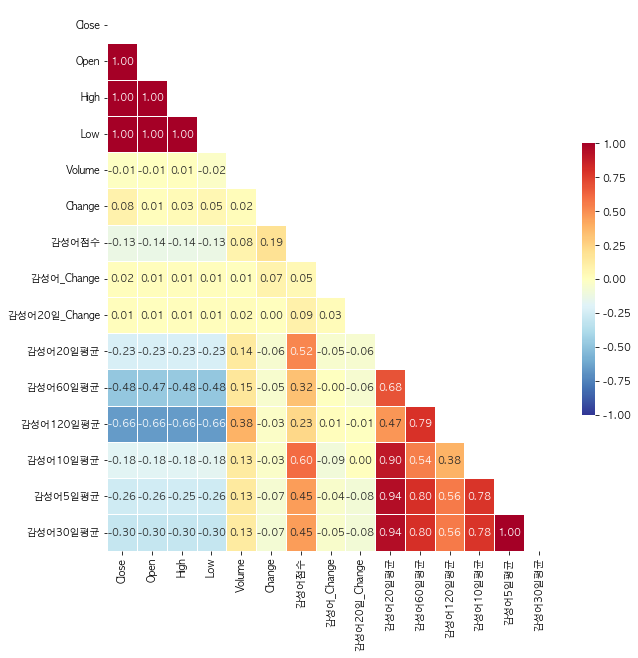

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')

# 그림 사이즈 지정
fig, ax=plt.subplots( figsize=(10,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.rcParams['axes.unicode_minus'] = False

# 히트맵을 그린다
sns.heatmap(df.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1,   # 컬러바 범위 -1 ~ 1
            fmt = '.2f' # 소수점 2번째자리까지만 출력
           )  


In [46]:
df

Date    Close     Open     High      Low        Volume  Change  \
0    2017-01-02  2026.16  2022.23  2031.79  2015.68  2.298800e+08 -0.0001   
1    2017-01-03  2043.97  2034.31  2044.07  2028.47  2.681300e+08  0.0088   
2    2017-01-04  2045.64  2046.29  2046.29  2040.61  3.714900e+08  0.0008   
3    2017-01-05  2041.95  2045.52  2046.50  2039.49  5.413400e+08 -0.0018   
4    2017-01-06  2049.12  2048.11  2051.84  2045.66  4.553500e+08  0.0035   
..          ...      ...      ...      ...      ...           ...     ...   
976  2020-12-23  2759.82  2737.74  2769.08  2716.28  1.120000e+09  0.0096   
977  2020-12-24  2806.86  2762.60  2812.16  2762.60  1.030000e+09  0.0170   
978  2020-12-28  2808.60  2820.95  2834.59  2799.56  1.010000e+09  0.0006   
979  2020-12-29  2820.51  2810.55  2823.44  2792.06  1.050000e+09  0.0042   
980  2020-12-30  2873.47  2820.36  2878.21  2809.35  1.070000e+09  0.0188   

     감성어점수  감성어_Change  감성어20일_Change  감성어20일평균    감성어60일평균   감성어120일평균  \
0    115.0         NaN            NaN       NaN         NaN         NaN   
1    149.0    0.295652            NaN       NaN         NaN         NaN   
2    121.0   -0.187919            NaN       NaN         NaN         NaN   
3    120.0   -0.008264            NaN       NaN         NaN         NaN   
4    112.0   -0.066667            NaN       NaN         NaN         NaN   
..     ...         ...            ...       ...         ...         ...   
976   85.0   -0.158416      -0.405594    145.90  144.366667  147.266667   
977  100.0    0.176471      -0.401198    143.00  145.100000  146.391667   
978  216.0    1.160000      -0.100000    139.65  144.816667  144.950000   
979  136.0   -0.370370      -0.150000    138.45  147.200000  144.466667   
980  137.0    0.007353      -0.328431    137.25  148.283333  143.266667   

     감성어10일평균     감성어5일평균    감성어30일평균  
0         NaN         NaN         NaN  
1         NaN         NaN         NaN  
2         NaN         NaN         NaN  
3         NaN         NaN         NaN  
4         NaN  101.000000         NaN  
..        ...         ...         ...  
976     116.7  157.866667  157.866667  
977     111.0  153.600000  153.600000  
978     111.0  152.133333  152.133333  
979     117.0  151.166667  151.166667  
980     121.9  149.333333  149.333333  

[981 rows x 16 columns]

<AxesSubplot:xlabel='Date', ylabel='감성어120일평균'>

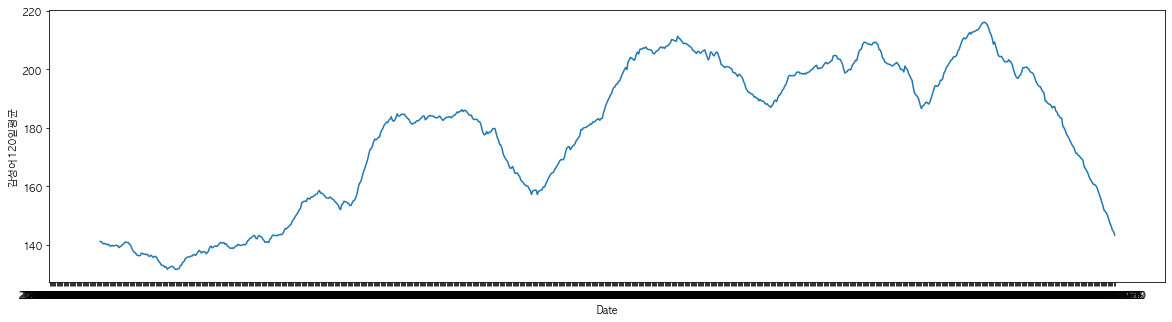

In [48]:
df날짜=df.copy()
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='감성어120일평균', data=df날짜)

In [49]:
df비교=df.copy()
df비교.index=df비교['Date']
df비교=df비교[['Close','감성어120일평균']]

In [50]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df비교[:]=ss.fit_transform(df비교[:])
# df_장전_글로벌['글로벌_감성어표준화_장전'][:]=ss.fit_transform(df_장전_글로벌['글로벌_감성어점수_장전'][:])
df비교

Close  감성어120일평균
Date                           
2017-01-02 -1.064176        NaN
2017-01-03 -0.975624        NaN
2017-01-04 -0.967320        NaN
2017-01-05 -0.985667        NaN
2017-01-06 -0.950018        NaN
...              ...        ...
2020-12-23  2.583614  -1.231191
2020-12-24  2.817499  -1.266286
2020-12-28  2.826150  -1.324109
2020-12-29  2.885367  -1.343495
2020-12-30  3.148686  -1.391626

[981 rows x 2 columns]

In [51]:
df비교['Date']=df비교.index
df비교

Close  감성어120일평균        Date
Date                                       
2017-01-02 -1.064176        NaN  2017-01-02
2017-01-03 -0.975624        NaN  2017-01-03
2017-01-04 -0.967320        NaN  2017-01-04
2017-01-05 -0.985667        NaN  2017-01-05
2017-01-06 -0.950018        NaN  2017-01-06
...              ...        ...         ...
2020-12-23  2.583614  -1.231191  2020-12-23
2020-12-24  2.817499  -1.266286  2020-12-24
2020-12-28  2.826150  -1.324109  2020-12-28
2020-12-29  2.885367  -1.343495  2020-12-29
2020-12-30  3.148686  -1.391626  2020-12-30

[981 rows x 3 columns]

<AxesSubplot:xlabel='Date'>

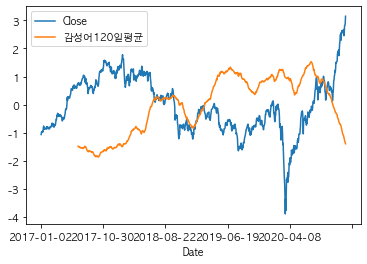

In [52]:
df비교.plot()

# 코스피 종가지수와 감성어 120일 평균선

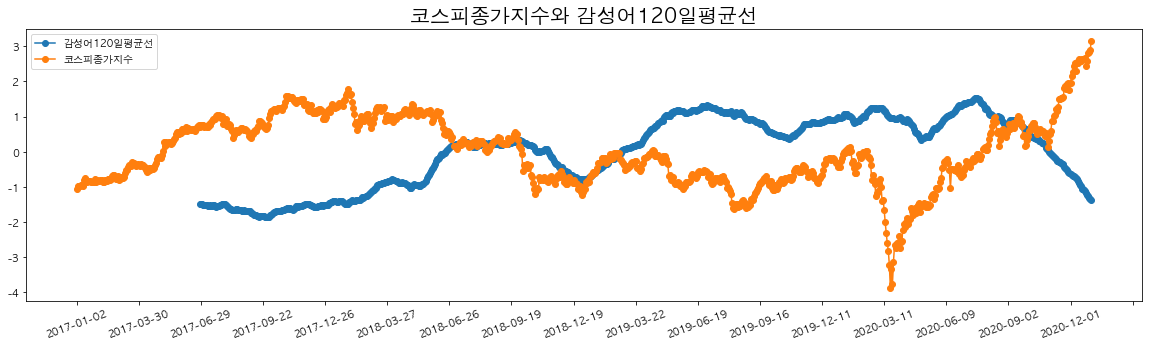

In [54]:
from matplotlib.ticker import MaxNLocator

plt.rcParams['axes.unicode_minus'] = False
fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot()


ax.plot(df비교['Date'], df비교['감성어120일평균'], marker='o', label='감성어120일평균선')
ax.plot(df비교['Date'], df비교['Close'], marker='o', label='코스피종가지수')
ax.xaxis.set_major_locator(MaxNLocator(20))

ax.legend()

plt.title('코스피종가지수와 감성어120일평균선', fontsize=20)
plt.xticks(rotation=20)
plt.show()

# heatmap으로 상관관계를 표시

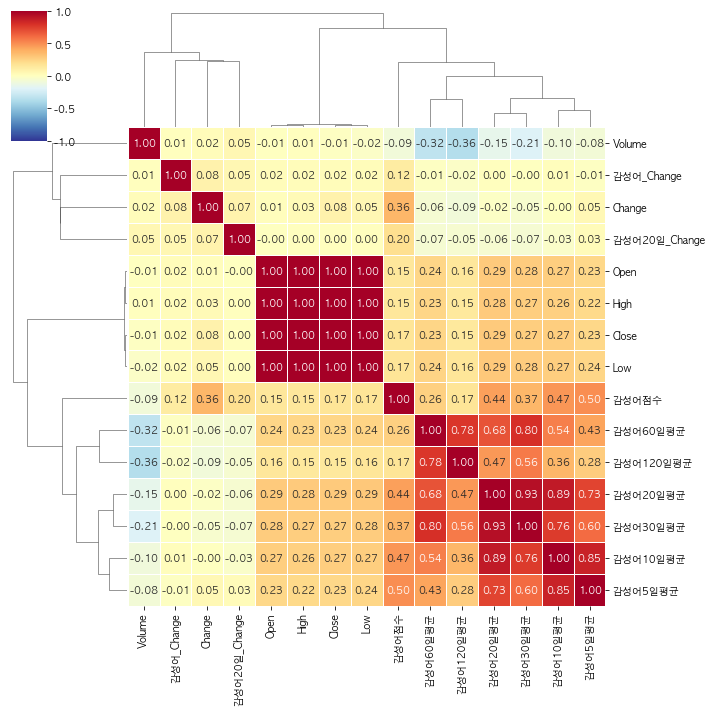

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (8,8)
sns.clustermap(df.corr(),
           linewidths=0.5,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'RdYlBu_r', #색상
           vmin = -1, vmax=1 ,#컬러차트 영역 -1 ~ +1
           fmt = '.2f'
          )